# Q-Score

In [1]:
%load_ext autoreload
%autoreload 2

from iqm.benchmarks.optimization.qscore import *
import random

## Choose (or define) a backend

In [2]:
backend = "deneb"

## Set IQM Token if using Resonance.

In [3]:
import os
os.environ["IQM_TOKEN"] = ""

## Qscore Configuration

In [4]:
num_qubits = 7
layout_chosen = [list(range(1,x+1)) for x in range(1,num_qubits)]
EXAMPLE_QSCORE = QScoreConfiguration(
    num_instances = 100,
    num_qaoa_layers= 1,
    shots = 10000,
    calset_id=None, # calibration set ID, default is None
    min_num_nodes =  2,
    max_num_nodes= None, # put it to None to run for all the node sizes.
    use_virtual_node = True,
    use_classically_optimized_angles = True,
    choose_qubits_routine = "custom",
    custom_qubits_array= layout_chosen, ## choose the custom layout of qubits to run the qscore. Note that for Deneb 0 is reserved for the resontor.
    seed = random.randint(1, 999999), ## you can decide to fix the value of the seed also.
    REM = True,
    mit_shots = 1000, ## could also increase the number of mitigation shots here.
    qpu_topology = "star",
    )

In [5]:
layout_chosen

[[1], [1, 2], [1, 2, 3], [1, 2, 3, 4], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6]]

## Run the experiment

In [6]:
benchmark_qscore = QScoreBenchmark(backend, EXAMPLE_QSCORE)
run0_qscore = benchmark_qscore.run()

2025-02-08 09:02:17,811 - iqm.benchmarks.logging_config - INFO - None


7


/opt/anaconda3/envs/iqm-benchmarks/lib/python3.11/site-packages/iqm/qiskit_iqm/iqm_provider.py:170: UserWarning: Unknown backend option(s): {'calibration_set_id'}
  warnings.warn(f'Unknown backend option(s): {unknown_options}')
2025-02-08 09:02:18,714 - iqm.benchmarks.logging_config - INFO - Retrieving all counts
/opt/anaconda3/envs/iqm-benchmarks/lib/python3.11/site-packages/iqm/qiskit_iqm/iqm_provider.py:170: UserWarning: Unknown backend option(s): {'rep_delay', 'calibration_set_id'}
  warnings.warn(f'Unknown backend option(s): {unknown_options}')
2025-02-08 09:02:27,706 - iqm.benchmarks.logging_config - INFO - REM: 4 calibration circuits to be executed!
/opt/anaconda3/envs/iqm-benchmarks/lib/python3.11/site-packages/iqm/qiskit_iqm/iqm_provider.py:170: UserWarning: Unknown backend option(s): {'calibration_set_id'}
  warnings.warn(f'Unknown backend option(s): {unknown_options}')
2025-02-08 09:02:32,731 - iqm.benchmarks.logging_config - INFO - Retrieving all counts
/opt/anaconda3/envs/

## Perform Analysis

In [7]:
result0_qscore = benchmark_qscore.analyze()

/Users/aniket.rath/Projects/Benchmarking/iqm-benchmarks/iqm-benchmarks/src/iqm/benchmarks/optimization/qscore.py:466: RuntimeWarning: invalid value encountered in scalar divide
  std_of_approximation_ratio = np.std(np.array(approximation_ratio_list)) / np.sqrt(
2025-02-08 09:04:18,138 - iqm.benchmarks.logging_config - INFO - Q-Score = 2 passed with approximation ratio (Beta) 1.4897; Avg MaxCut size: 1.0000
2025-02-08 09:04:18,147 - iqm.benchmarks.logging_config - INFO - Q-Score = 3 passed with approximation ratio (Beta) 1.2758; Avg MaxCut size: 1.9300
2025-02-08 09:04:18,160 - iqm.benchmarks.logging_config - INFO - Q-Score = 4 passed with approximation ratio (Beta) 1.1687; Avg MaxCut size: 3.1642
2025-02-08 09:04:18,175 - iqm.benchmarks.logging_config - INFO - Q-Score = 5 passed with approximation ratio (Beta) 0.9338; Avg MaxCut size: 4.3583
2025-02-08 09:04:18,189 - iqm.benchmarks.logging_config - INFO - Q-Score = 6 passed with approximation ratio (Beta) 0.9755; Avg MaxCut size: 6.301

In [8]:
result0_qscore.observations

[BenchmarkObservation(name='mean_approximation_ratio', value=1.489691252499749, identifier=BenchmarkObservationIdentifier(qubit_indices=2), uncertainty=nan),
 BenchmarkObservation(name='is_succesful', value='True', identifier=BenchmarkObservationIdentifier(qubit_indices=2), uncertainty=None),
 BenchmarkObservation(name='Qscore_result', value=2, identifier=BenchmarkObservationIdentifier(qubit_indices=2), uncertainty=None),
 BenchmarkObservation(name='mean_approximation_ratio', value=1.2757653493844086, identifier=BenchmarkObservationIdentifier(qubit_indices=3), uncertainty=nan),
 BenchmarkObservation(name='is_succesful', value='True', identifier=BenchmarkObservationIdentifier(qubit_indices=3), uncertainty=None),
 BenchmarkObservation(name='Qscore_result', value=3, identifier=BenchmarkObservationIdentifier(qubit_indices=3), uncertainty=None),
 BenchmarkObservation(name='mean_approximation_ratio', value=1.168701948425124, identifier=BenchmarkObservationIdentifier(qubit_indices=4), uncerta

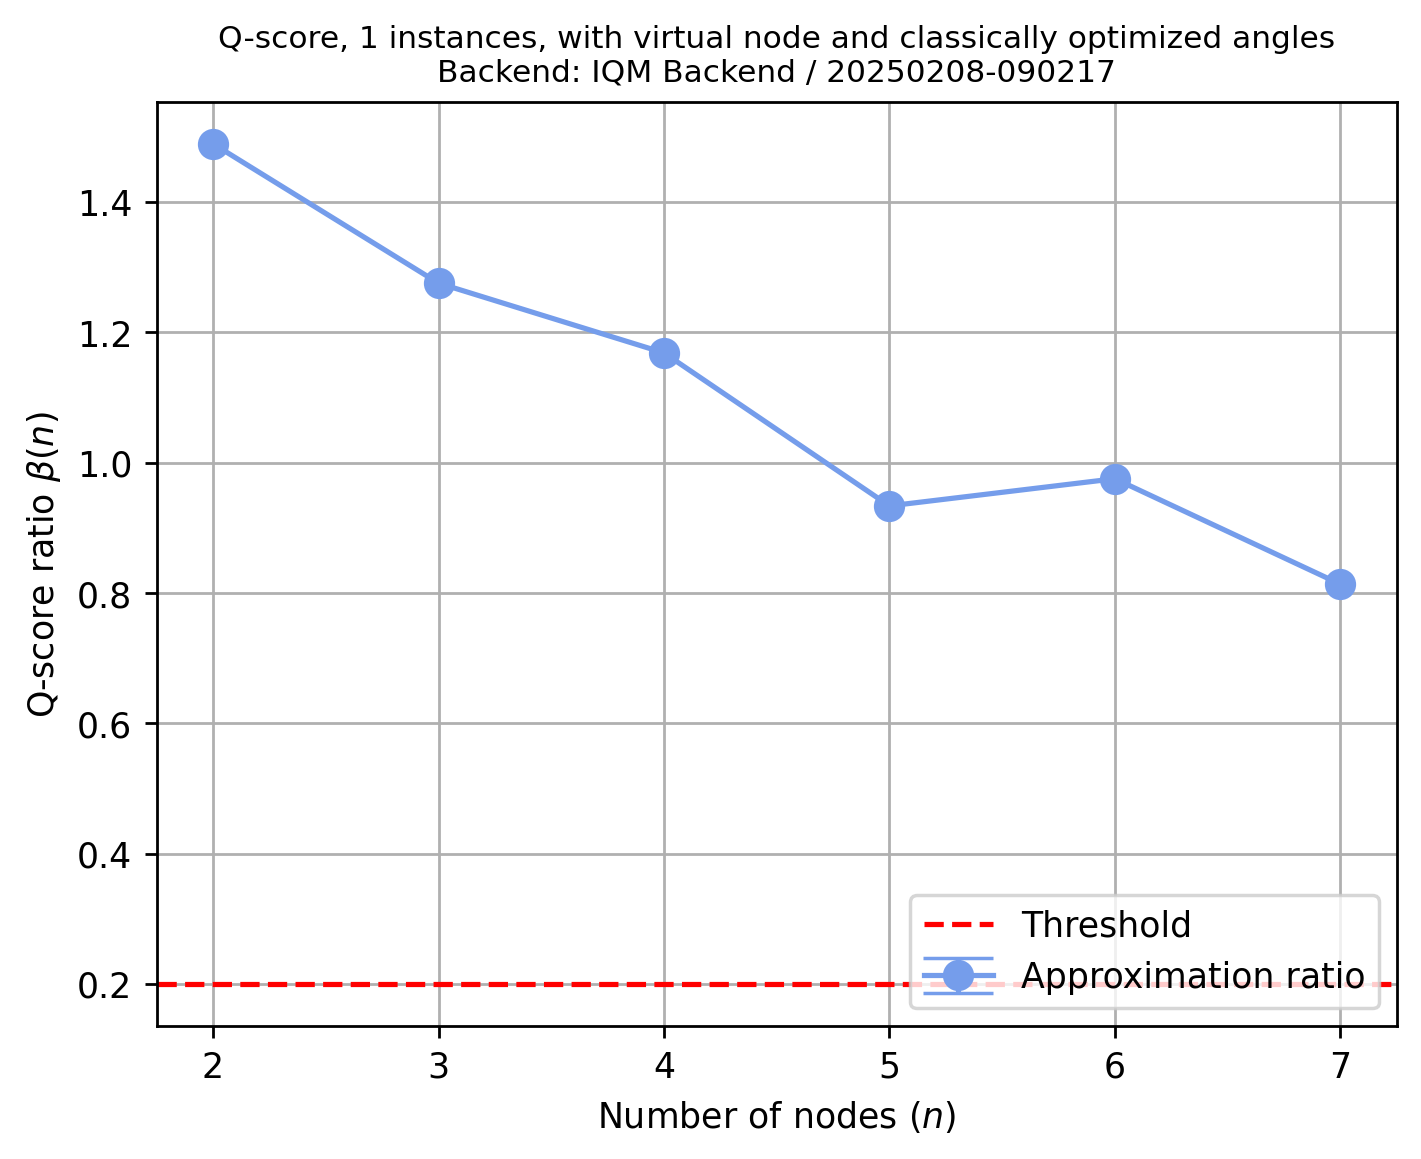

In [9]:
result0_qscore.plot_all()

Once the qscore has been executed store the data:

In [10]:
beta_values = [x.value for x in result0_qscore.observations[::3]]
beta_uncertainty = [x.uncertainty for x in result0_qscore.observations[::3]]
beta_threshold = [0.2]*len(beta_values)

In [11]:
## store data
import pickle
import os
from datetime import datetime

date_str = datetime.now().strftime("%Y-%m-%d")
save_dir = f"data_qscore_{date_str}"
os.makedirs(save_dir, exist_ok=True)

# Function to save a list as a pickle file
def save_pickle(data, filename):
    with open(filename, "wb") as f:
        pickle.dump(data, f)

# Save each list separately
save_pickle(beta_values, os.path.join(save_dir, "beta_values.pkl"))
save_pickle(beta_uncertainty, os.path.join(save_dir, "beta_uncertainty.pkl"))
save_pickle(beta_threshold, os.path.join(save_dir, "beta_threshold.pkl"))

print(f"Pickle files saved in {save_dir}")

Pickle files saved in data_qscore_2025-02-08
